# **Make necessary assumptions and do push into the pulled repo with the generated outputs in the same file**

In [14]:
#Example Code
import numpy as np
import keras
import tensorflow
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_pts = 500
np.random.seed(0)
X,y=datasets.make_circles(n_samples=n_pts,random_state=123,noise=0.1,factor=0.2)


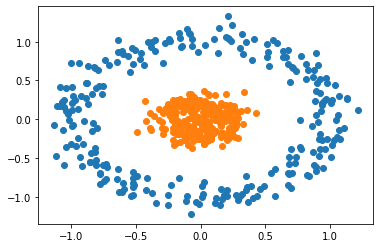

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

## **Above is the example code and its corresponding output....**

#Exploratory Data Analysis (Includes Graphs and other necessary operations)

In [1]:
import pandas as pd 


In [117]:
#your code goes on...
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
train.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [5]:
train.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.0,94268.000000
mean,11.949454,10.872365,0.733875,10.838893,187.707907,10.355367,0.0,1002.864099
std,9.601178,10.752540,0.196034,6.950710,107.652333,4.172897,0.0,118.290080
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.527778,2.244444,0.600000,5.796000,114.000000,8.372000,0.0,1011.800000
50%,12.077778,12.077778,0.780000,10.014200,180.000000,10.046400,0.0,1016.330000
75%,18.866667,18.866667,0.890000,14.151900,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
train.shape

(94268, 12)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94268 entries, 0 to 94267
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            94268 non-null  object 
 1   Summary                   94268 non-null  object 
 2   Precip Type               94125 non-null  object 
 3   Temperature (C)           94268 non-null  float64
 4   Apparent Temperature (C)  94268 non-null  float64
 5   Humidity                  94268 non-null  float64
 6   Wind Speed (km/h)         94268 non-null  float64
 7   Wind Bearing (degrees)    94268 non-null  int64  
 8   Visibility (km)           94268 non-null  float64
 9   Cloud Cover               94268 non-null  int64  
 10  Pressure (millibars)      94268 non-null  float64
 11  Daily Summary             94268 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.6+ MB


In [7]:
print(train['Daily Summary'].nunique())
print(train['Summary'].nunique())
print(train['Precip Type'].nunique())

207
26
2


In [8]:
train['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [9]:
train['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry'], dtype=object)

In [10]:
train.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 143
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Cloud Cover                   0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [11]:

train = train.fillna(method='ffill')

In [12]:
train.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [42]:
train['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022331CCAA90>,
      dtype=object)

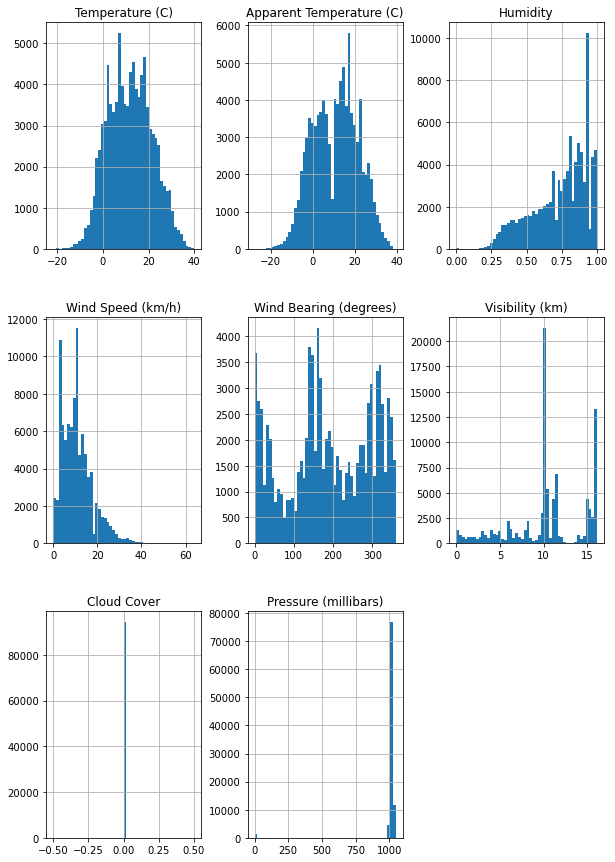

In [13]:
train.hist(bins=50,figsize=(10,15))


In [46]:
train['Cloud Cover'].unique()

array([0], dtype=int64)



'Cloud Cover' takes values zero. So it dropped it


In [15]:
train = train.drop('Cloud Cover',axis=1)



'Pressure (millibars)'.
Some observations are zero.It seems that they are missing values. "The lowest measurable sea-level pressure is found at the centers of tropical cyclones and tornadoes,with a record low of 870 mbar" (Source: Wikipedia. link: https://en.wikipedia.org/wiki/Atmospheric_pressure)
Let's fill the zeros with the median:


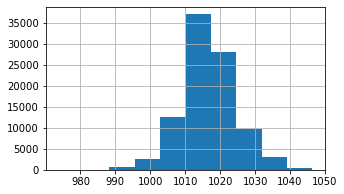

In [21]:
from pylab import rcParams
pressure_median = train['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
train["Pressure (millibars)"] = train.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
train['Pressure (millibars)'].hist()

In [17]:
corr = train.corr()
corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992615,-0.630608,0.009902,0.030361,0.391739,-0.005064
Apparent Temperature (C),0.992615,1.000000,-0.600912,-0.056005,0.029313,0.380412,0.000169
Humidity,-0.630608,-0.600912,1.000000,-0.226191,0.000747,-0.368906,0.004802
Wind Speed (km/h),0.009902,-0.056005,-0.226191,1.000000,0.103928,0.105131,-0.048979
Wind Bearing (degrees),0.030361,0.029313,0.000747,0.103928,1.000000,0.050142,-0.011436
Visibility (km),0.391739,0.380412,-0.368906,0.105131,0.050142,1.000000,0.061321
Pressure (millibars),-0.005064,0.000169,0.004802,-0.048979,-0.011436,0.061321,1.000000


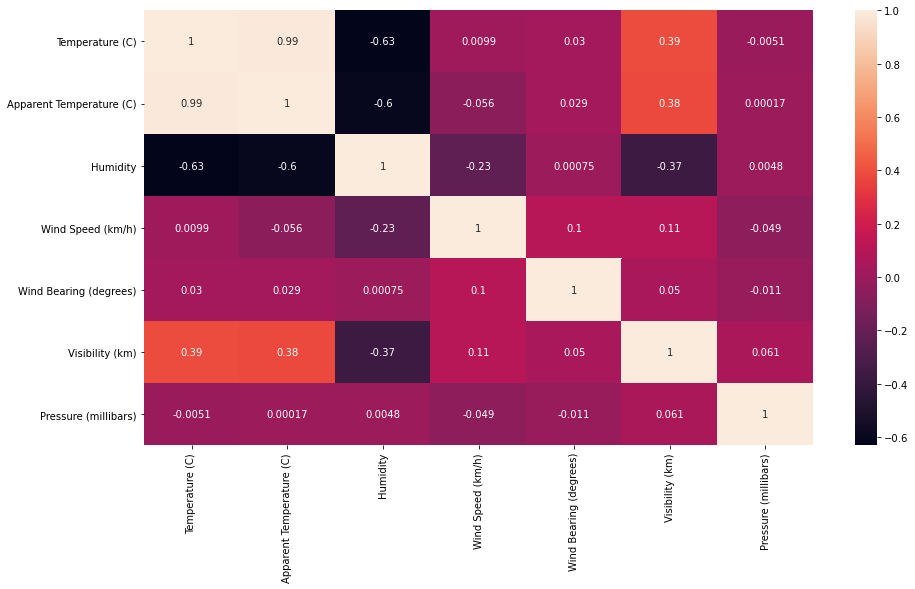

In [18]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

C:\Users\SIMRAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SIMRAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Temperature & Apparent Temperature')]

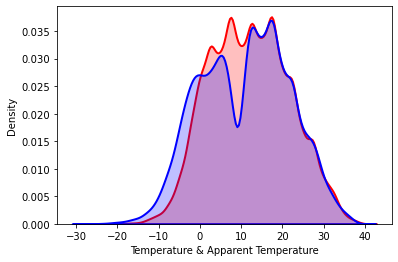

In [19]:
sns.distplot(train["Temperature (C)"], hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})


sns.distplot(train["Apparent Temperature (C)"], hist=False, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(xlabel='Temperature & Apparent Temperature', ylabel='Density')



# There is a similarity in the varience of Temperature & Apparent Temperature as there ranges(uppervalue-lowervalues) are close. 

In [ ]:


// your output



# Feature Engineering

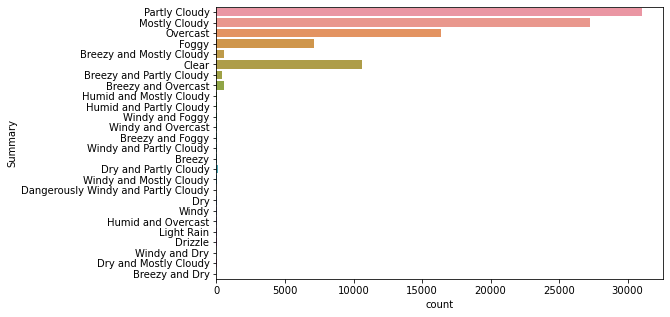

In [22]:
#your code goes on...
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=train['Summary'])
# your output

In [23]:
len(train['Summary'].unique()) #How many different 'Summary' categories are there?

26



There are 26 'Summary' categories which makes it a bit confusing. Let's see which are the most common.


In [24]:

summary_freq=pd.crosstab(index=train['Summary'],columns="count")  
summary_freq_rel = summary_freq/summary_freq.sum() 
summary_freq_rel.sort_values('count', ascending=False) #relative frequencies

col_0,count
Summary,
Partly Cloudy,0.329009
Mostly Cloudy,0.289038
Overcast,0.173877
Clear,0.112806
Foggy,0.075137
Breezy and Overcast,0.005580
Breezy and Mostly Cloudy,0.005463
Breezy and Partly Cloudy,0.004095
Dry and Partly Cloudy,0.000912




Most common categories are: Partly Cloudy (33%), Mostly Cloudy(29%), Overcast (17%), Clear (11%), Foggy(7%) = 97% out of the total.
Moreover, these weather conditions also appear with other weather characteristics. E.g. 'Windy and Foggy'.
Let's create a new categorical variable: Cloud (summary) : Foggy (5), Overcast (4), Mostly Cloudy (3), Partly Cloudy (2), Clear (1), Nothing (0)
There are other weather characteristics contained in 'Summary': Windy&Breezy, Rain, Humid&Dry but there are just a few observations within these categories. Moreover this information is already contained in other variables: 'Wind Speed (km/h)', 'Precip Type' and 'Humidity'.


In [25]:
#new categorical variable:
def cloud_categorizer(row):
    row = str(row).lower()
    category = ""
    if "foggy" in row:
        category = 5
    elif "overcast" in row:
        category = 4
    elif "mostly cloudy" in row:
        category = 3
    elif "partly cloudy" in row:
        category = 2
    elif "clear" in row:
        category = 1
    else:
        category = 0
    return category 

train["cloud (summary)"] = train.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

C:\Users\SIMRAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


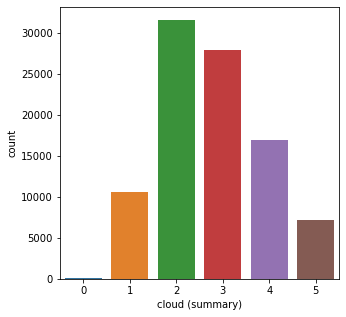

In [26]:
rcParams['figure.figsize'] = 5, 5
sns.countplot(train['cloud (summary)']) 

As can be observed, there are a few observations with no information about "clouds" or foggy in variable 'Summary'.
How can we assign a value to them?
I decided to look at variable 'Visibility (km)', which obviously is correlated to "clouds" and foggy.

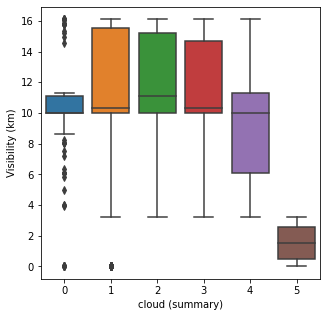

In [27]:
sns.boxplot(x=train['cloud (summary)'], y=train['Visibility (km)']) 



It seems that the boxplot of the null values is very similar to the one of "overcast"so let's assume that obsevations with no information about "clouds" and foggy fall in the "overcast" category.


In [28]:
def cloud_categorizer(row):
    row = str(row).lower()
    category = ""
    if "foggy" in row:
        category = 5
    elif "overcast" in row:
        category = 4
    elif "mostly cloudy" in row:
        category = 3
    elif "partly cloudy" in row:
        category = 2
    elif "clear" in row:
        category = 1
    else:
        category = 4 
    return category 

train["cloud (summary)"] = train.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

C:\Users\SIMRAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '1=Clear'),
 Text(0, 0, '2=Partly Cloudy'),
 Text(0, 0, '3=Mostly Cloudy'),
 Text(0, 0, '4=Overcast'),
 Text(0, 0, '5=Foggy')]

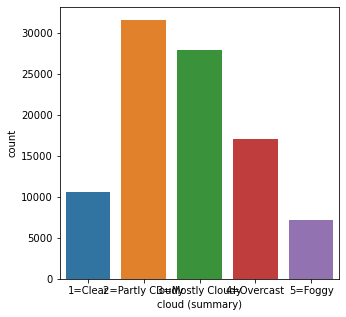

In [29]:
ax=sns.countplot(train['cloud (summary)'])
ax.set_xticklabels(('1=Clear', '2=Partly Cloudy', '3=Mostly Cloudy', '4=Overcast', '5=Foggy'))

In [30]:
len(train['Daily Summary'].unique()) #number of categories

207

In [31]:
daily_summary_freq =pd.crosstab(index=train['Daily Summary'],columns="count") 
daily_summary_freqrel=daily_summary_freq/daily_summary_freq.sum()
daily_summary_freqrel.sort_values('count', ascending=False).head(10)#Show the 10 most common categories

col_0,count
Daily Summary,
Mostly cloudy throughout the day.,0.206698
Partly cloudy throughout the day.,0.101805
Partly cloudy until night.,0.064168
Partly cloudy starting in the morning.,0.053719
Foggy in the morning.,0.044055
Foggy starting overnight continuing until morning.,0.037425
Partly cloudy until evening.,0.034370
Mostly cloudy until night.,0.032577
Overcast throughout the day.,0.030551


C:\Users\SIMRAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '1=Clear'),
 Text(0, 0, '2=Partly Cloudy'),
 Text(0, 0, '3=Mostly Cloudy'),
 Text(0, 0, '4=Overcast'),
 Text(0, 0, '5=Foggy')]

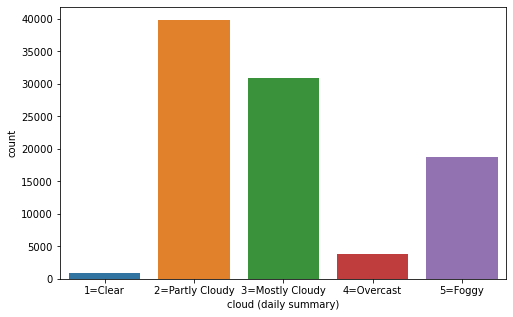

In [32]:

train["cloud (daily summary)"] = train.apply (lambda row:cloud_categorizer(row["Daily Summary"]) , axis = 1)
rcParams['figure.figsize'] = 8, 5
ax=sns.countplot(train['cloud (daily summary)'])
ax.set_xticklabels(('1=Clear', '2=Partly Cloudy', '3=Mostly Cloudy', '4=Overcast', '5=Foggy'))

In [33]:
train.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,cloud (summary),cloud (daily summary)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,2,2
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,2,2
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,3,2
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2,2
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,3,2


In [34]:
train_updated = train.drop(['Summary','Daily Summary'],axis = 1)

Dropping Summary and Daily as we already have this attribute in encoded and preprocessed form 

In [35]:
train_updated.head()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),cloud (summary),cloud (daily summary)
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2,2
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2,2
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,3,2
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2,2
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,3,2


In [36]:
train_updated.isnull().sum()

Formatted Date              0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
cloud (summary)             0
cloud (daily summary)       0
dtype: int64

In [37]:
#Handling Categorical variable
#drop_first=True will avoid dummy variable trap
cols_to_transform = [ 'Precip Type']
df_with_dummies = pd.get_dummies(train_updated,columns = cols_to_transform,drop_first=True)
df=df_with_dummies



In [38]:
df.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),cloud (summary),cloud (daily summary),Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2,2,0
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2,2,0
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,3,2,0
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2,2,0
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,3,2,0


In [39]:
df.isnull().sum()

Formatted Date              0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
cloud (summary)             0
cloud (daily summary)       0
Precip Type_snow            0
dtype: int64

In [40]:
df[['Date','Hour','Dummy']]=df['Formatted Date'].str.split(" ",expand=True) 
#2006-04-01 00:

In [43]:
df.drop('Dummy',axis=1,inplace=True)


In [44]:
df['Hour']=df['Hour'].str.split(':').str[0]

In [45]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [46]:
df.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),cloud (summary),cloud (daily summary),Precip Type_snow,Date,Hour
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2,2,0,732402,00
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2,2,0,732402,01
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,3,2,0,732402,02
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2,2,0,732402,03
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,3,2,0,732402,04


In [47]:
df.drop('Formatted Date',axis=1,inplace=True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),cloud (summary),cloud (daily summary),Precip Type_snow,Date,Hour
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2,2,0,732402,00
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2,2,0,732402,01
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,3,2,0,732402,02
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2,2,0,732402,03
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,3,2,0,732402,04


In [49]:
df.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
cloud (summary)             0
cloud (daily summary)       0
Precip Type_snow            0
Date                        0
Hour                        0
dtype: int64

# Data Augmentation

In [ ]:
//your code goes on...
// your output

In [50]:
#your code goes on...
from sklearn.model_selection import train_test_split

X = df[df.loc[:, df.columns != 'cloud (daily summary)'].columns]
y = df['cloud (daily summary)']
# your output

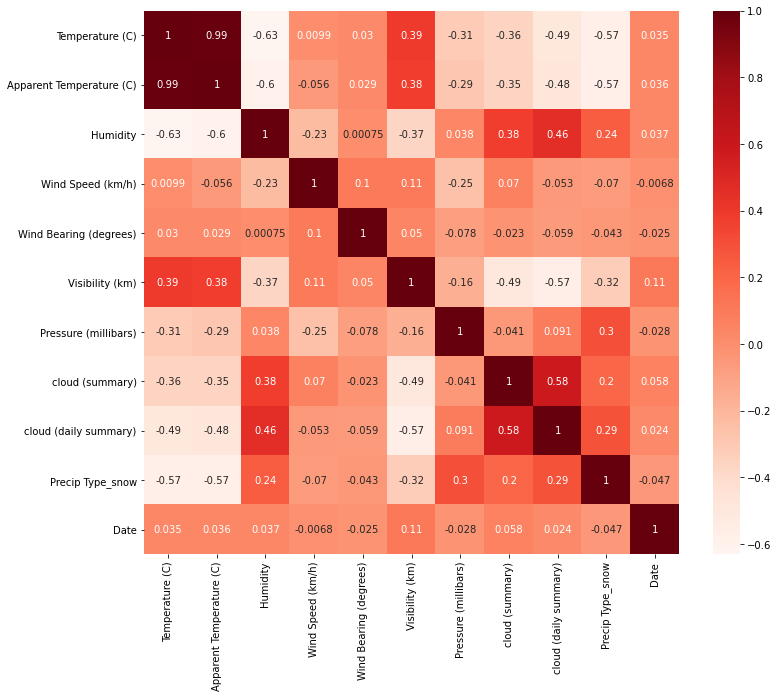

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Using Pearson correlation method

#The correlation coefficient has values between -1 to 1
#— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
#— A value closer to 1 implies stronger positive correlation
#— A value closer to -1 implies stronger negative correlation

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [52]:
cor["cloud (daily summary)"]

Temperature (C)            -0.488763
Apparent Temperature (C)   -0.478127
Humidity                    0.459439
Wind Speed (km/h)          -0.052916
Wind Bearing (degrees)     -0.059265
Visibility (km)            -0.565695
Pressure (millibars)        0.090825
cloud (summary)             0.584811
cloud (daily summary)       1.000000
Precip Type_snow            0.286771
Date                        0.024445
Name: cloud (daily summary), dtype: float64

In [53]:
#Correlation with output variable
#Usually we should take 0.05 as the benchmark. But to increase more number of features in input set, we added the bencmark to 0.1
cor_target = abs(cor["cloud (daily summary)"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Temperature (C)             0.488763
Apparent Temperature (C)    0.478127
Humidity                    0.459439
Visibility (km)             0.565695
cloud (summary)             0.584811
cloud (daily summary)       1.000000
Precip Type_snow            0.286771
Name: cloud (daily summary), dtype: float64

In [155]:
from sklearn.model_selection import train_test_split
X_train=df.iloc[:,[0,1,2,5,7]]  #'Temparature','ApparentTemperature','Humidity','Summary','Visibility']
#X = df[df.loc[:, df.columns != ['DailySummaryCat','Temparature','ApparentTemperature','Humidity','WindSpeed','WindBearing','Pressure','Date','Hour']].columns]
y_train = df['cloud (daily summary)']

In [67]:
test.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2016-11-01 00:00:00.000 +0100,Mostly Cloudy,NaN,6.205556,4.527778,0.92,8.1466,297,0.0,0,1021.74,Partly cloudy starting in the afternoon.
1,2016-11-01 01:00:00.000 +0100,Mostly Cloudy,NaN,5.827778,4.177778,0.92,7.7763,296,0.0,0,1021.69,Partly cloudy starting in the afternoon.
2,2016-11-01 02:00:00.000 +0100,Partly Cloudy,NaN,5.311111,3.616667,0.93,7.6153,298,0.0,0,1021.61,Partly cloudy starting in the afternoon.
3,2016-11-01 03:00:00.000 +0100,Partly Cloudy,NaN,4.800000,3.088889,0.94,7.3738,300,0.0,0,1021.54,Partly cloudy starting in the afternoon.
4,2016-11-01 04:00:00.000 +0100,Clear,NaN,4.483333,2.883333,0.95,6.8103,303,0.0,0,1021.54,Partly cloudy starting in the afternoon.


In [118]:
len(test['Summary'].unique()) #How many different 'Summary' categories are there?

10

In [119]:

summary_freq=pd.crosstab(index=test['Summary'],columns="count")  
summary_freq_rel_test = summary_freq/summary_freq.sum() 
summary_freq_rel_test.sort_values('count', ascending=False) #relative frequencies

col_0,count
Summary,
Mostly Cloudy,0.387643
Partly Cloudy,0.328604
Clear,0.117162
Overcast,0.094279
Foggy,0.029748
Light Rain,0.021053
Drizzle,0.015561
Rain,0.004577
Breezy and Overcast,0.000915


In [120]:
#new categorical variable:
def cloud_categorizer(row):
    row = str(row).lower()
    category = ""
    if "foggy" in row:
        category = 5
    elif "overcast" in row:
        category = 4
    elif "mostly cloudy" in row:
        category = 3
    elif "partly cloudy" in row:
        category = 2
    elif "clear" in row:
        category = 1
    else:
        category = 4
    return category 

test["cloud (summary)"] = test.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

C:\Users\SIMRAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


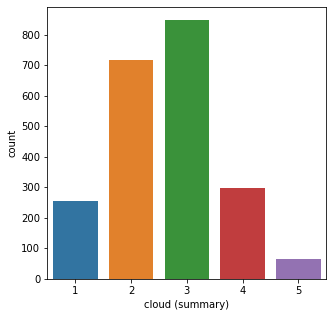

In [121]:
rcParams['figure.figsize'] = 5, 5
sns.countplot(test['cloud (summary)']) 

In [122]:
len(test['Daily Summary'].unique()) #number of categories

32

In [123]:
daily_summary_freq =pd.crosstab(index=test['Daily Summary'],columns="count") 
daily_summary_freqrel_test=daily_summary_freq/daily_summary_freq.sum()
daily_summary_freqrel_test.sort_values('count', ascending=False).head(10)#Show the 10 most common categories

col_0,count
Daily Summary,
Mostly cloudy throughout the day.,0.274600
Partly cloudy throughout the day.,0.175744
Partly cloudy until night.,0.054920
Partly cloudy starting in the morning.,0.054920
Partly cloudy starting in the afternoon.,0.043936
Overcast throughout the day.,0.032952
Clear throughout the day.,0.022426
Mostly cloudy starting in the morning.,0.021968
Partly cloudy until evening.,0.021968


C:\Users\SIMRAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '1=Clear'),
 Text(0, 0, '2=Partly Cloudy'),
 Text(0, 0, '3=Mostly Cloudy'),
 Text(0, 0, '4=Overcast'),
 Text(0, 0, '5=Foggy')]

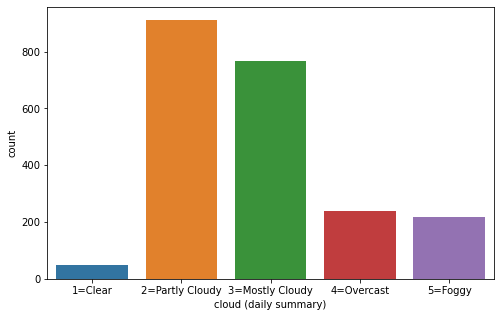

In [124]:
test["cloud (daily summary)"] = test.apply (lambda row:cloud_categorizer(row["Daily Summary"]) , axis = 1)
rcParams['figure.figsize'] = 8, 5
ax=sns.countplot(test['cloud (daily summary)'])
ax.set_xticklabels(('1=Clear', '2=Partly Cloudy', '3=Mostly Cloudy', '4=Overcast', '5=Foggy'))

In [126]:
test['cloud (daily summary)'].value_counts()

2    912
3    768
4    240
5    216
1     49
Name: cloud (daily summary), dtype: int64

In [127]:
test.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,cloud (summary),cloud (daily summary)
0,2016-11-01 00:00:00.000 +0100,Mostly Cloudy,NaN,6.205556,4.527778,0.92,8.1466,297,0.0,0,1021.74,Partly cloudy starting in the afternoon.,3,2
1,2016-11-01 01:00:00.000 +0100,Mostly Cloudy,NaN,5.827778,4.177778,0.92,7.7763,296,0.0,0,1021.69,Partly cloudy starting in the afternoon.,3,2
2,2016-11-01 02:00:00.000 +0100,Partly Cloudy,NaN,5.311111,3.616667,0.93,7.6153,298,0.0,0,1021.61,Partly cloudy starting in the afternoon.,2,2
3,2016-11-01 03:00:00.000 +0100,Partly Cloudy,NaN,4.800000,3.088889,0.94,7.3738,300,0.0,0,1021.54,Partly cloudy starting in the afternoon.,2,2
4,2016-11-01 04:00:00.000 +0100,Clear,NaN,4.483333,2.883333,0.95,6.8103,303,0.0,0,1021.54,Partly cloudy starting in the afternoon.,1,2


In [129]:
test.shape

(2185, 14)

In [128]:
test.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 374
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Cloud Cover                   0
Pressure (millibars)          0
Daily Summary                 0
cloud (summary)               0
cloud (daily summary)         0
dtype: int64

In [133]:
test['Precip Type'].value_counts()

rain    1811
Name: Precip Type, dtype: int64

In [136]:
test = test.dropna()

In [137]:
test['Precip Type'].unique()

array(['rain'], dtype=object)

In [138]:
test_updated = test.drop(['Summary','Daily Summary'],axis = 1)

In [140]:
test_updated.isnull().sum()

Formatted Date              0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
cloud (summary)             0
cloud (daily summary)       0
dtype: int64

In [144]:
#Handling Categorical variable
#drop_first=True will avoid dummy variable trap
cols_to_transform = [ 'Precip Type']
df_with_dummies = pd.get_dummies(test_updated,columns = cols_to_transform)
df_test=df_with_dummies



In [145]:
df_test.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),cloud (summary),cloud (daily summary),Precip Type_rain
24,2016-11-10 00:00:00.000 +0100,4.455556,2.277778,0.91,8.9033,169,11.8496,0,1019.49,2,3,1
25,2016-11-10 01:00:00.000 +0100,4.100000,1.838889,0.93,8.9838,171,9.3863,0,1019.41,2,3,1
26,2016-11-10 02:00:00.000 +0100,3.761111,1.422222,0.93,9.0321,170,10.0464,0,1019.30,2,3,1
27,2016-11-10 03:00:00.000 +0100,3.483333,1.083333,0.93,9.0804,165,8.6618,0,1019.22,2,3,1
28,2016-11-10 04:00:00.000 +0100,3.333333,0.883333,0.92,9.1609,157,6.5205,0,1019.21,2,3,1


# Model and Accuracy Prediction on given test data

In [154]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_pearson, y_pearson, test_size=0.25, random_state=128)

X_test=df_test.iloc[:,[1,2,3,6,9]]  #'Temparature','ApparentTemperature','Humidity','Summary','Visibility']
#X = df[df.loc[:, df.columns != ['DailySummaryCat','Temparature','ApparentTemperature','Humidity','WindSpeed','WindBearing','Pressure','Date','Hour']].columns]
y_test = df_test['cloud (daily summary)']

In [157]:
X_test

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),cloud (summary)
24,4.455556,2.277778,0.91,11.8496,2
25,4.100000,1.838889,0.93,9.3863,2
26,3.761111,1.422222,0.93,10.0464,2
27,3.483333,1.083333,0.93,8.6618,2
28,3.333333,0.883333,0.92,6.5205,2
...,...,...,...,...,...
2180,26.016667,26.016667,0.43,16.1000,2
2181,24.583333,24.583333,0.48,15.5526,2
2182,22.038889,22.038889,0.56,16.1000,2
2183,21.522222,21.522222,0.60,16.1000,2


In [158]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train.values)
X_test_scaled = sc_X.fit_transform(X_test.values)


In [160]:
X_test_scaled.shape

(2161, 5)

In [161]:
y_test.shape

(2161,)

**Training with Decision Tree Classifier**

In [162]:

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [163]:
Classifer = DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)

In [164]:
Classifer.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

In [191]:
prediction_DC = Classifer.predict(X_test_scaled)

In [192]:
accuracy_score(y_true=y_test, y_pred=prediction_DC)

0.5233688107357705

In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, prediction_DC)
print(cm)
accuracy_score(y_test, prediction_DC)

[[  0   0   0   0  49]
 [  0 625 223   0  40]
 [  0 241 429   0  98]
 [  0  18 150   0  72]
 [  0  48  91   0  77]]


0.5233688107357705

**Applying logistic regression**

In [167]:
lrClassifier = LogisticRegression()
lrClassifier.fit(X_train_scaled,y_train)
prediction = lrClassifier.predict(X_test_scaled)
accuracy_score(y_true=y_test, y_pred=prediction)

C:\Users\SIMRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4974548819990745

In [170]:
prediction

array([2, 3, 3, ..., 2, 2, 2], dtype=int64)

# Logistic Regression Accuracy Score and Confusion Matrix

In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, prediction)
print(cm)
accuracy_score(y_test, prediction)

[[  0  18   0   0  31]
 [  0 538 267   0  83]
 [  0 153 461   0 154]
 [  0  15 152   0  73]
 [  0  51  89   0  76]]


0.4974548819990745

# Saving Prediction_output.csv file 

In [178]:
test2 = test.iloc[:,[0]]

In [182]:
test3 = pd.DataFrame(prediction,columns = ['Prediction'])

In [183]:
test3

,Prediction
0,2
1,3
2,3
3,3
4,5
...,...
2156,2
2157,2
2158,2
2159,2


In [184]:
test2 = test2.join(test3)

In [190]:
test2.to_csv('Prediction_Output.csv')